In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob
import os
#해안선 받아놓기
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')  


In [2]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='red', edgecolor='black',linewidth=0.5, zorder=2)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [19]:
data= gpd.read_file('./Ex/220111/data/세계유산지정구역.shp', encoding='euckr')
data

,Id,Area,OBJECTID,면적,Shape_Leng,Shape_Area,지역,Shape_Le_1,MPA_NAM,GOS_NUM,...,FID_고_1,Id_1,면적_1,BUFF_DIS_1,FID_경계,Id_12,BUFF_DIS_2,layer,path,geometry
0,0,6953.31697972059,0,None,0.00000,0.000000,None,0.0,None,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,1_한국의갯벌_유산지역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((126.57815 36.13700, 126.57749 ..."
1,0,None,1,5531.44015539754,0.74055,0.005496,None,0.0,None,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,1_한국의갯벌_유산지역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((126.65586 35.56558, 126.66428 ..."
2,0,None,0,None,0.00000,1110.650113,None,0.0,None,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,1_한국의갯벌_유산지역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((126.23942 35.10044, 126.23934 ..."
3,0,None,0,6033.10418575447,0.00000,0.000000,None,0.0,None,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,1_한국의갯벌_유산지역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((127.51321 34.88254, 127.51351 ..."
4,0,None,0,1880.35542691399,0.74055,0.005496,None,0.0,None,None,...,0.0,0.0,None,0.0,0.0,0.0,0.0,2_한국의갯벌_완충구역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((126.48301 35.53524, 126.48307 ..."
5,0,36.5939383930053,0,None,0.00000,0.000000,None,0.0,None,None,...,0.0,0.0,None,0.0,0.0,0.0,0.0,2_한국의갯벌_완충구역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((126.64455 36.05682, 126.64459 ..."
6,0,None,0,None,0.00000,67324.201511,None,0.0,None,None,...,0.0,0.0,None,0.0,0.0,0.0,0.0,2_한국의갯벌_완충구역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((125.97694 34.60378, 125.97722 ..."
7,0,None,0,1801.56960798441,0.00000,0.000000,None,0.0,None,None,...,0.0,0.0,None,0.0,0.0,0.0,0.0,2_한국의갯벌_완충구역_200814,E:/00_2021_MSP/000.2019_해양공간계획(MSP)_2/#습지보호구역(...,"MULTIPOLYGON (((127.54329 34.83897, 127.54326 ..."


In [20]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
data= data.to_crs({'init': 'epsg:5179'})
coastline= coastline.to_crs({'init': 'epsg:5179'})

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [45]:
data['area']=data.area/10000/(10**6)
data[['Area', '면적', 'area']]

,Area,면적,area
0,6953.31697972059,None,0.006929
1,None,5531.44015539754,0.005508
2,None,None,0.109810
3,None,6033.10418575447,0.005977
4,None,1880.35542691399,0.001450
5,36.5939383930053,None,0.003311
6,None,None,0.010302
7,None,1801.56960798441,0.001087


In [46]:
data.crs

<Derived Projected CRS: +init=epsg:5179 +type=crs>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

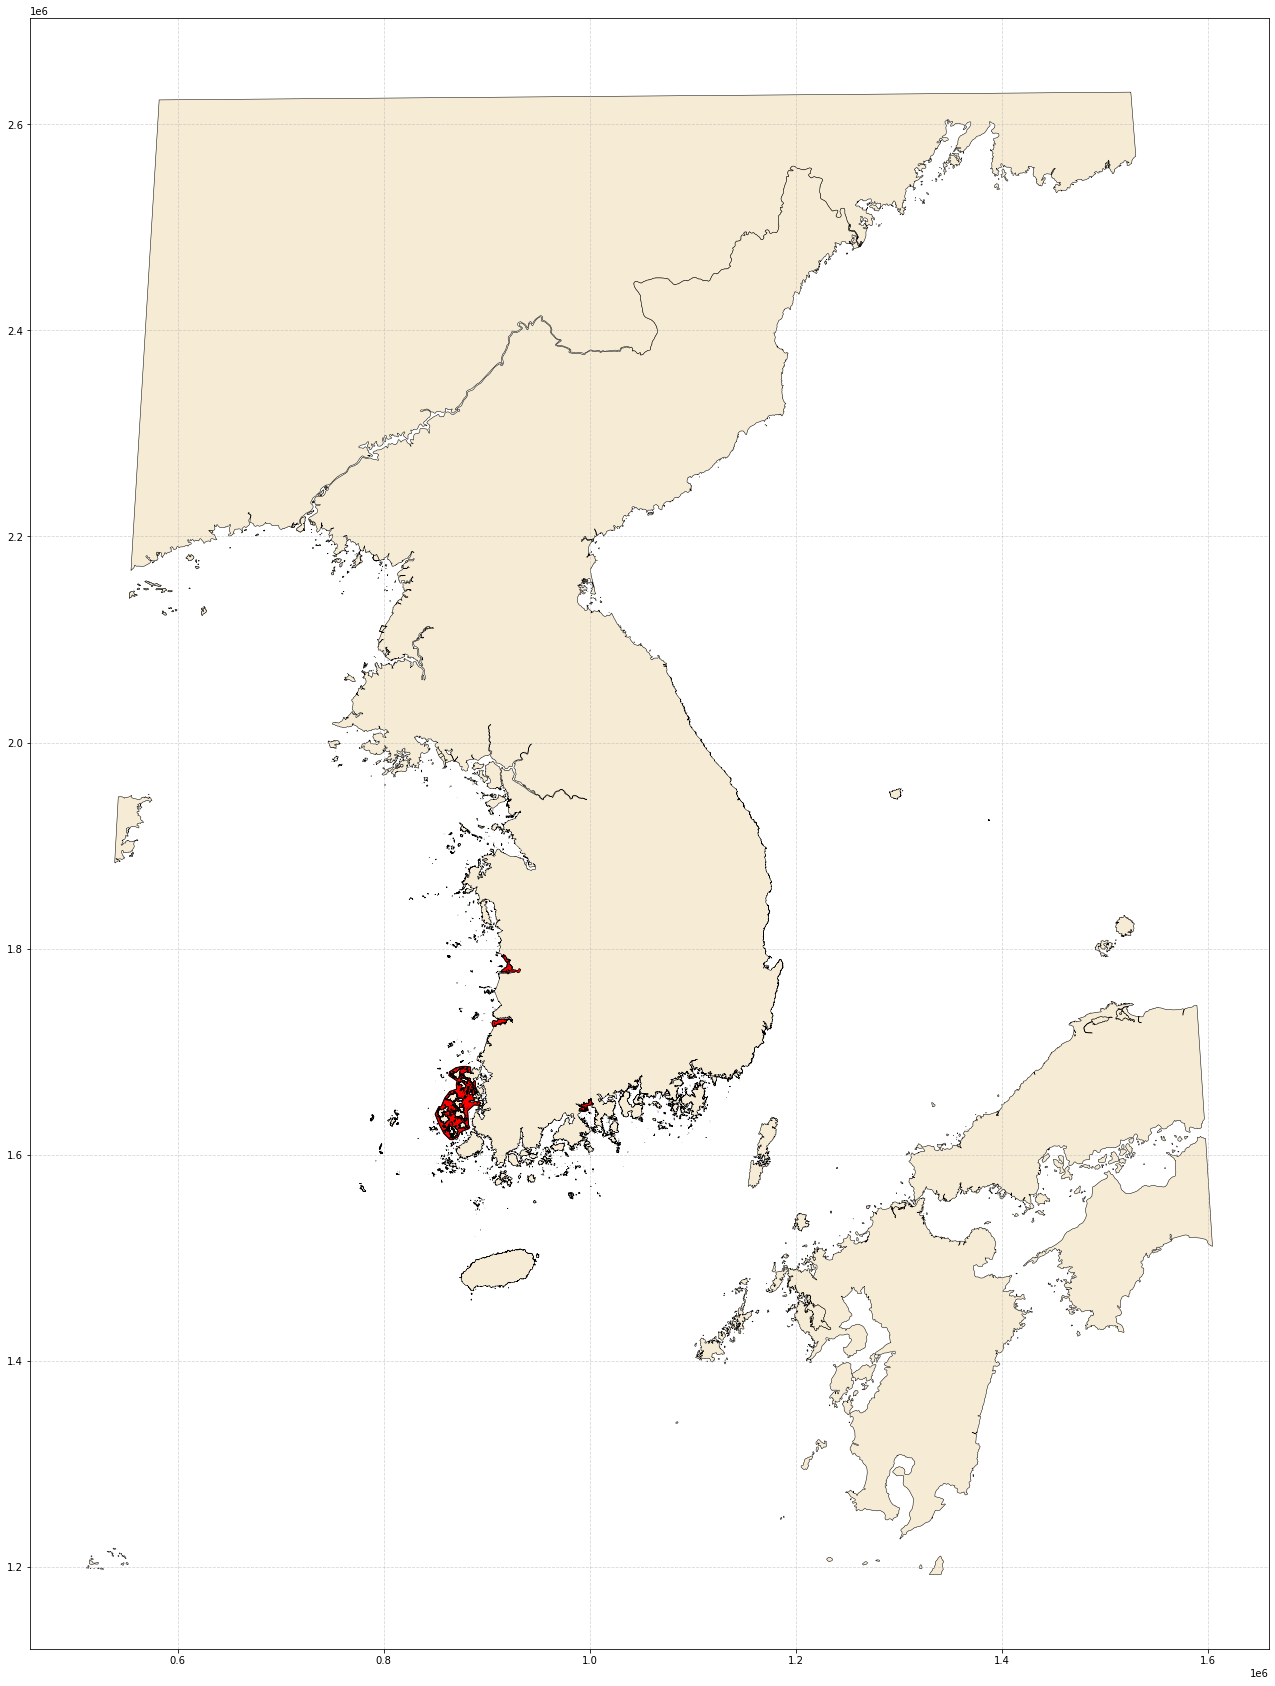

In [48]:
plot_map(data)

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


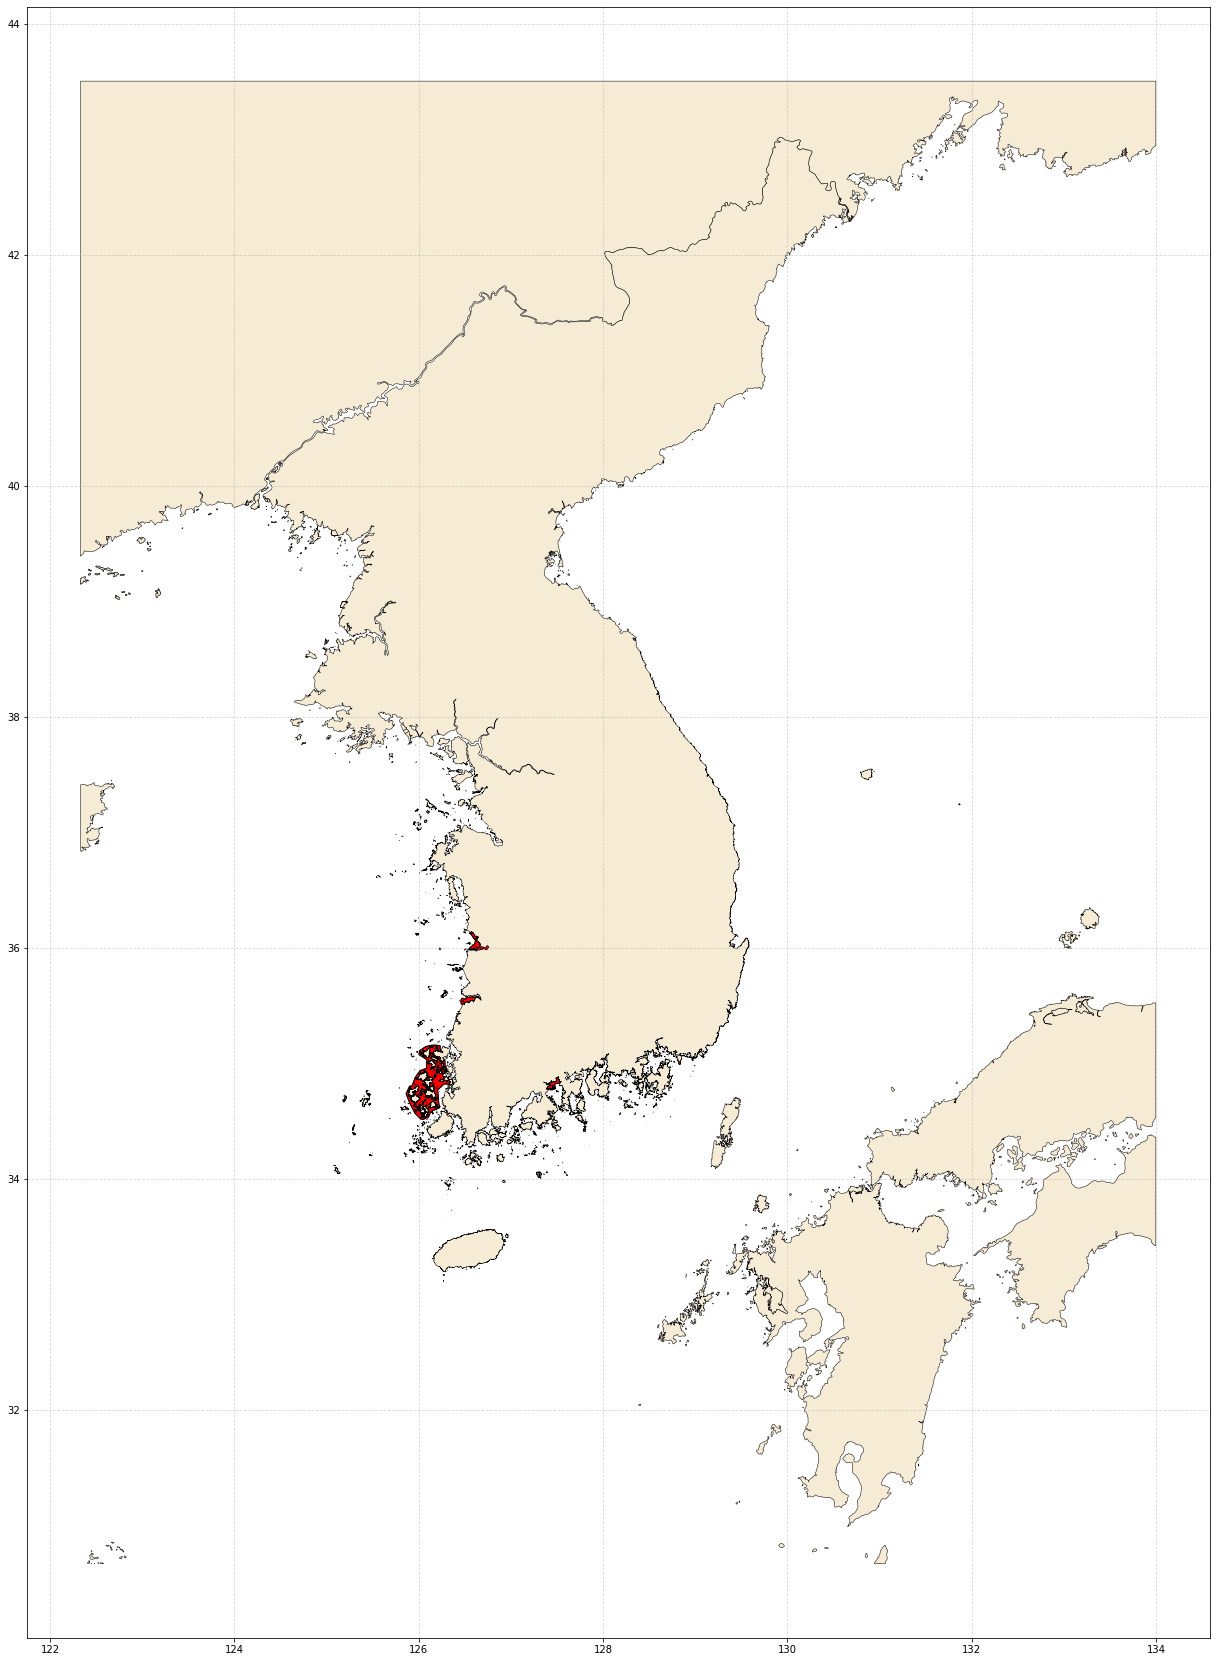

In [49]:
data= data.to_crs({'init': 'epsg:4326'})
coastline= coastline.to_crs({'init': 'epsg:4326'})
plot_map(data)

In [29]:
coastline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
coastline= coastline.to_crs({'init': 'epsg:3395'})

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [38]:
coastline['area'] = coastline.area
coastline

In [40]:
coastline.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
coastline

,OBJECTID,Shape_Leng,Shape_Area,label,_count,_sum,_mean,geometry,area
0,1,1357.105550,8.891953e+04,lnd_a,NaN,NaN,NaN,"POLYGON ((13634858.341 3568386.132, 13634844.5...",1.189319e+05
1,2,1561.578470,1.034822e+05,lnd_a,NaN,NaN,NaN,"POLYGON ((13630981.370 3568386.125, 13631122.9...",1.383970e+05
2,3,7454.152319,2.152753e+06,lnd_a,NaN,NaN,NaN,"POLYGON ((13643550.526 3569147.345, 13643993.1...",2.880410e+06
3,4,3817.852596,9.655038e+05,lnd_a,NaN,NaN,NaN,"POLYGON ((13639815.189 3569306.677, 13640293.1...",1.291666e+06
4,5,6578.163533,2.089195e+06,lnd_a,NaN,NaN,NaN,"POLYGON ((13628042.668 3569926.279, 13628662.2...",2.794241e+06
...,...,...,...,...,...,...,...,...,...
19989,19990,215.102510,2.932528e+03,lnd_a,0.0,0.0,NaN,"POLYGON ((14059538.172 3961110.436, 14059538.4...",4.222172e+03
19990,19991,65.791039,2.992477e+02,lnd_a,0.0,0.0,NaN,"POLYGON ((14066239.655 3968716.358, 14066239.7...",4.314508e+02
19991,19992,5.031071,1.933996e+00,lnd_a,0.0,0.0,NaN,"POLYGON ((14066242.701 3968758.740, 14066242.8...",2.788432e+00
19992,19993,4.570763,1.511995e+00,lnd_a,0.0,0.0,NaN,"POLYGON ((14065920.910 3968876.062, 14065921.7...",2.180030e+00
